In [1]:
"""
Viewing a reaction path diagram.

This script uses Graphviz to generate an image. You must have Graphviz installed
and the program 'dot' must be on your path for this example to work.
Graphviz can be obtained from http://www.graphviz.org/ or (possibly) installed
using your operating system's package manager.
"""
%matplotlib inline
import cantera as ct
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [2]:
gas_red = ct.import_phases('CH4_RED15_Jaravel.test.xml', ['reduced'])

In [3]:
gas_qss = ct.Solution('CH4_RED15_Jaravel.test.xml', 'QSS', gas_red)

In [6]:
gas_sk20.n_reactions

97

In [5]:
# these lines can be replaced by any commands that generate
# an object of a class derived from class Kinetics in some state.
gas_sk20 = ct.Solution('CH4_SK20_Jaravel.xml')
gas_gri30 = ct.Solution('gri30.cti')

In [ ]:
gas_red15 = ct.Solution('CH4_RED15_Jaravel.xml', 'reduced')

In [27]:
k = 4

In [28]:
# Input parameters
p = ct.one_atm  # pressure
tin_f = 300.0  # fuel inlet temperature
tin_o = 300.0  # oxidizer inlet temperature
mdot_o = k * 0.72  # kg/m^2/s
mdot_f = k * 0.24  # kg/m^2/s

comp_o = 'O2:0.21, N2:0.78'  # air composition
comp_f = 'CH4:1'  # fuel composition

width = 0.02 # Distance between inlets is 2 cm

loglevel = 1  # amount of diagnostic output (0 to 5)

# Create the gas object used to evaluate all thermodynamic, kinetic, and
# transport properties.
gas = gas_sk20
gas.TP = gas.T, p

# Create an object representing the counterflow flame configuration,
# which consists of a fuel inlet on the left, the flow in the middle,
# and the oxidizer inlet on the right.
f = ct.CounterflowDiffusionFlame(gas, width=width)

# Set the state of the two inlets
f.fuel_inlet.mdot = mdot_f
f.fuel_inlet.X = comp_f
f.fuel_inlet.T = tin_f

f.oxidizer_inlet.mdot = mdot_o
f.oxidizer_inlet.X = comp_o
f.oxidizer_inlet.T = tin_o

# Set the boundary emissivities
f.set_boundary_emissivities(0.0, 0.0)
# Turn radiation off
f.radiation_enabled = False

f.show_solution()



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> fuel_inlet <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

    Mass Flux:         0.96 kg/m^2/s 
    Temperature:        300 K 
    Mass Fractions: 
                     CH4           1 



>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> flame <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

    Pressure:   1.013e+05 Pa

-------------------------------------------------------------------------------
          z           u           V           T      lambda           H 
-------------------------------------------------------------------------------
          0       1.473           0         300           0   5.174e-09 
      0.004      0.6871       127.2       533.9           0   1.889e-06 
      0.008    -0.09882       170.6        2033           0     1.4e-05 
      0.012     -0.8848       113.7       322.1           0   1.786e-07 
      0.016      -1.671       56.87         300           0   7.596e-12 
       0.02      -2.457           0         300           0   2.782e-18 

----------

In [29]:
f.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

# Solve the problem
f.solve(loglevel, auto=True)
f.show_solution()
f.save('sk17_diffusion.xml')

# write the velocity, temperature, and mole fractions to a CSV file
f.write_csv('sk17_diffusion.csv', quiet=False)

f_sk20 = f


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001139       5.59
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0006487      5.268
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.007389        3.8
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

********************** Flame is extinct on 6 point grid **********************

*********** Solving on 12 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 

In [30]:
# Input parameters
p = ct.one_atm  # pressure
tin_f = 300.0  # fuel inlet temperature
tin_o = 300.0  # oxidizer inlet temperature
mdot_o = k * 0.72  # kg/m^2/s
mdot_f = k * 0.24  # kg/m^2/s

comp_o = 'O2:0.21, N2:0.78'  # air composition
comp_f = 'CH4:1'  # fuel composition

width = 0.02 # Distance between inlets is 2 cm

loglevel = 1  # amount of diagnostic output (0 to 5)

# Create the gas object used to evaluate all thermodynamic, kinetic, and
# transport properties.
gas = gas_gri30
gas.TP = gas.T, p

# Create an object representing the counterflow flame configuration,
# which consists of a fuel inlet on the left, the flow in the middle,
# and the oxidizer inlet on the right.
f = ct.CounterflowDiffusionFlame(gas, width=width)

# Set the state of the two inlets
f.fuel_inlet.mdot = mdot_f
f.fuel_inlet.X = comp_f
f.fuel_inlet.T = tin_f

f.oxidizer_inlet.mdot = mdot_o
f.oxidizer_inlet.X = comp_o
f.oxidizer_inlet.T = tin_o

# Set the boundary emissivities
f.set_boundary_emissivities(0.0, 0.0)
# Turn radiation off
f.radiation_enabled = False

f.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

# Solve the problem
f.solve(loglevel, auto=True)
f.show_solution()
f.save('gri30_diffusion.xml')

# write the velocity, temperature, and mole fractions to a CSV file
f.write_csv('gri30_diffusion.csv', quiet=False)

f_gri30 = f


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.068e-05        6.3
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002737      5.489
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001386      4.916
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.03551      1.692
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

********************** Flame is extinct on 6 point grid **********************

*********** Solving on 12 point grid with energy equation enabled ************

............................................

(0.0, 0.02)

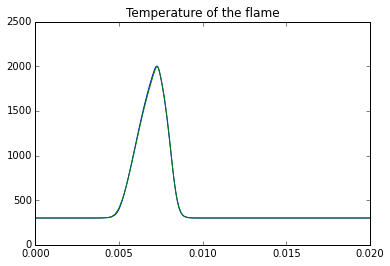

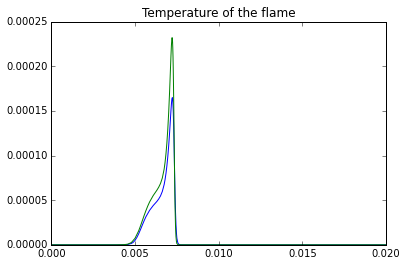

In [26]:
# Plot Temperature without radiation
plt.figure()
plt.plot(f_sk20.flame.grid, f_sk20.T, f_gri30.flame.grid, 
         f_gri30.T, label='Temperature without radiation')
plt.title('Temperature of the flame')
plt.ylim(0,2500)
plt.xlim(0.000, 0.020)

plt.figure()
plt.plot(f_sk20.flame.grid, f_sk20.Y[gas_sk20.species_index('CH2O')], 
         f_gri30.flame.grid, f_gri30.Y[gas_gri30.species_index('CH2O')],
         label='Y')
plt.title('Temperature of the flame')
plt.xlim(0.000, 0.020)

In [16]:
ct.__file__

'/Users/wuhao/Codes/Cantera_Chemistry/Cantera/2.4/lib/python2.7/site-packages/cantera/__init__.pyc'

In [31]:
gas_sk20.n_reactions

97